<a href="https://colab.research.google.com/github/AdionDaddy/test/blob/main/basic_lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import kagglehub


path = kagglehub.dataset_download("mohamedhanyyy/chest-ctscan-images")

print("Path to dataset files:", path)

100%|██████████| 119M/119M [00:01<00:00, 124MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1


In [ ]:
import random, shutil
import glob
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot
from matplotlib.image import imread



In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer,BatchNormalization
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from sklearn import metrics


In [ ]:
train_data = os.path.join(path, 'Data/train')
test_data = os.path.join(path, 'Data/test')
validation_data = os.path.join(path, 'Data/valid')

In [ ]:
train_datagen = ImageDataGenerator(
    dtype='float32',
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)

test_datagen = ImageDataGenerator(
    dtype='float32',
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)
validation_datagen = ImageDataGenerator(
    dtype='float32',
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)


train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)


test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224, 224),
    batch_size=200,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_data,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
Train_data_no_aug = tf.keras.utils.image_dataset_from_directory(
    train_data,
    image_size=(224, 224),
    batch_size=613,
    labels='inferred',
    label_mode='categorical'
)

Test_data_no_aug = tf.keras.utils.image_dataset_from_directory(
    test_data,
    image_size=(224, 467),
    batch_size=315,
    labels='inferred',
    label_mode='categorical'
)

Validation_data_no_aug = tf.keras.utils.image_dataset_from_directory(
    validation_data,
    image_size=(210, 467),
    batch_size=64,
    labels='inferred',
    label_mode='categorical'
)

Found 613 files belonging to 4 classes.
Found 315 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


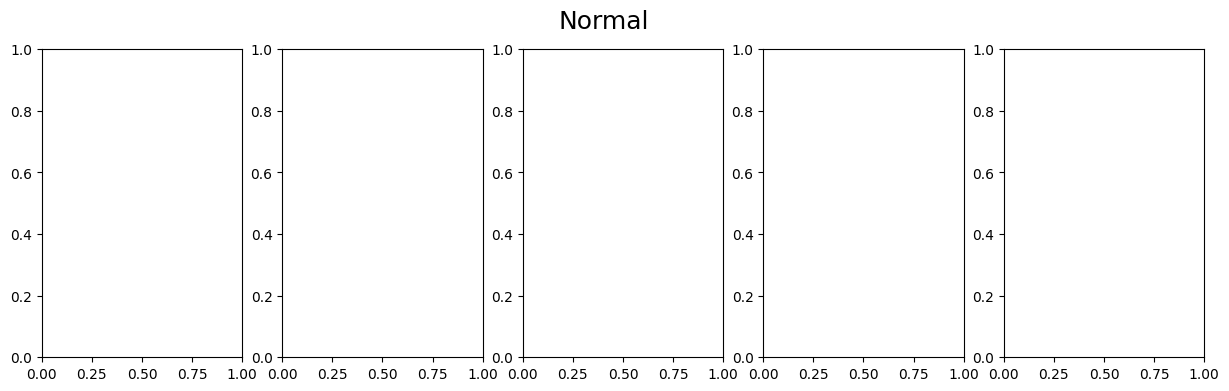

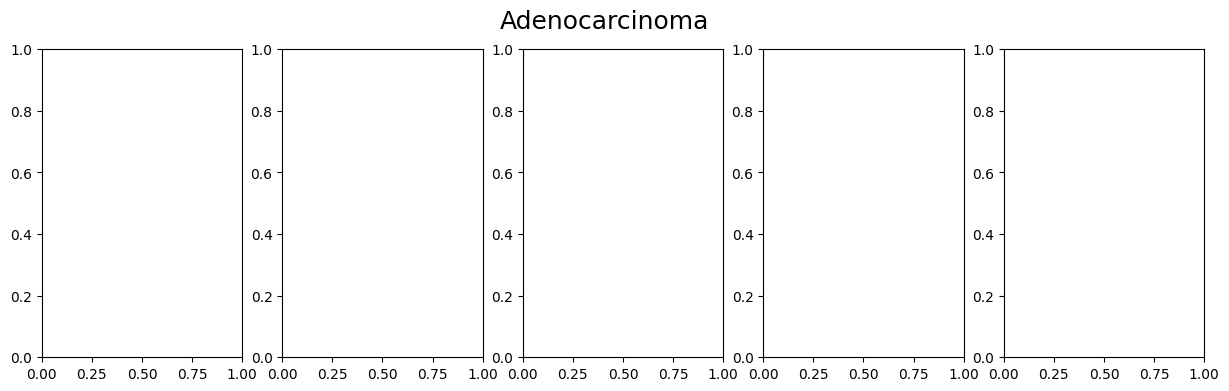

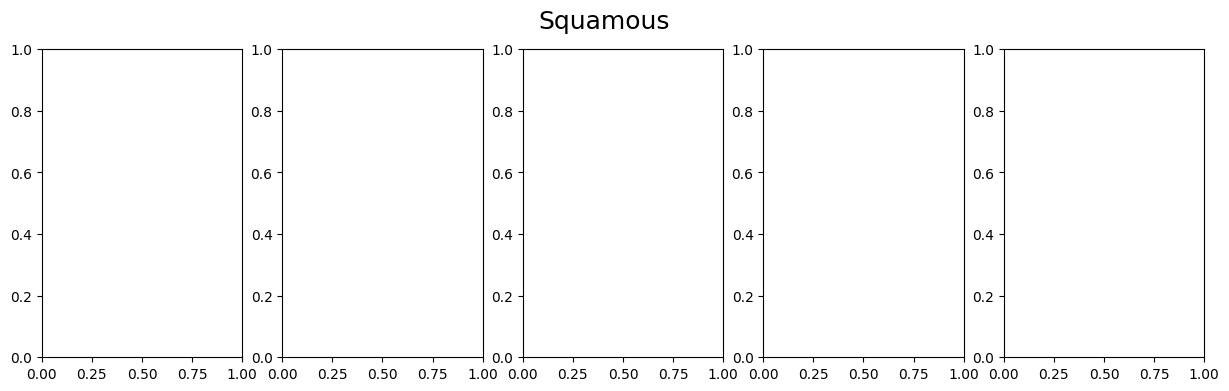

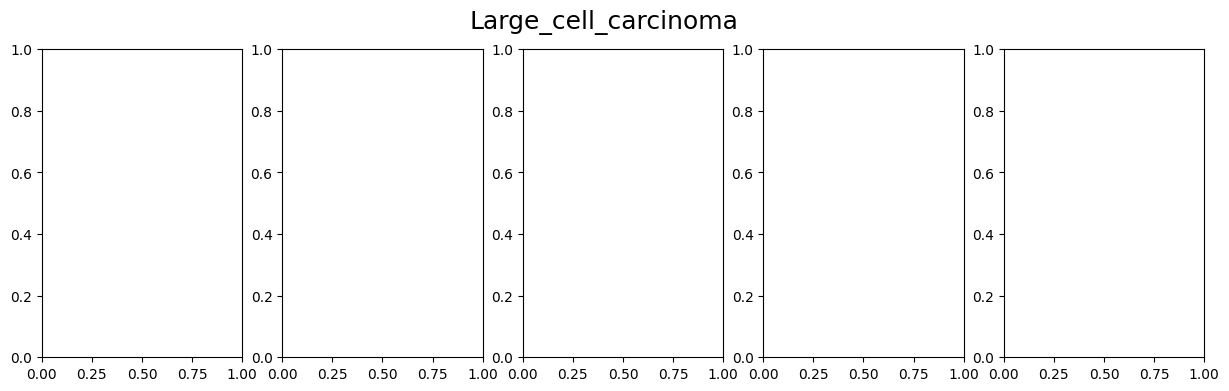

In [ ]:
train_normal = glob.glob(os.path.join(train_data, 'Normal/*'))  # Get paths to Normal images
train_adenocarcinoma = glob.glob(os.path.join(train_data, 'Adenocarcinoma/*'))  # Get paths to Adenocarcinoma images
train_squamous = glob.glob(os.path.join(train_data, 'Squamous/*'))  # Get paths to Squamous images
train_large_cell_carcinoma = glob.glob(os.path.join(train_data, 'Large cell carcinoma/*'))  # Get paths to Large cell carcinoma images


fig1, ax1 = plt.subplots(1, 5, figsize=(15, 4))
fig1.suptitle("Normal", fontsize=18)
# Ensure there are at least 5 images to display, otherwise adjust the range
for i in range(min(5, len(train_normal))):
    ax1[i].imshow(imread(train_normal[i]))

fig1, ax1 = plt.subplots(1, 5, figsize=(15, 4))
fig1.suptitle("Adenocarcinoma", fontsize=18)
for i in range(min(5, len(train_adenocarcinoma))):
    ax1[i].imshow(imread(train_adenocarcinoma[i]))

fig1, ax1 = plt.subplots(1, 5, figsize=(15, 4))
fig1.suptitle("Squamous", fontsize=18)
for i in range(min(5, len(train_squamous))):
    ax1[i].imshow(imread(train_squamous[i]))

fig1, ax1 = plt.subplots(1, 5, figsize=(15, 4))
fig1.suptitle("Large_cell_carcinoma", fontsize=18)
for i in range(min(5, len(train_large_cell_carcinoma))):
    ax1[i].imshow(imread(train_large_cell_carcinoma[i]))

plt.show()

In [ ]:
from keras.applications import ResNet50

image_shape=(224,224,3)

res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = image_shape)

# make all layers except conv5 layers not trainable
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

resnet_model = Sequential()
resnet_model.add(res_model)
resnet_model.add(Dropout(0.3))
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(4, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
optimizer = optimizers.SGD(learning_rate= 0.00003)
resnet_model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,122,500 (92.02 MB)

 Trainable params: 15,506,180 (59.15 MB)

 Non-trainable params: 8,616,320 (32.87 MB)

In [ ]:
history_res = resnet_model.fit(train_generator,
                            steps_per_epoch = 8,
                            epochs = 70,
                            verbose = 1,
                            validation_data = validation_generator)

Epoch 1/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 163s 18s/step - acc: 0.2077 - loss: 2.3374 - val_acc: 0.3056 - val_loss: 1.6386
Epoch 2/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - acc: 0.1982 - loss: 2.4552 - val_acc: 0.2917 - val_loss: 1.5744
Epoch 3/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 203s 19s/step - acc: 0.2533 - loss: 2.1769 - val_acc: 0.2639 - val_loss: 1.5831
Epoch 4/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - acc: 0.2119 - loss: 2.2749 - val_acc: 0.3056 - val_loss: 1.5636
Epoch 5/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 155s 18s/step - acc: 0.2028 - loss: 2.2611 - val_acc: 0.2361 - val_loss: 1.6167
Epoch 6/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - acc: 0.2139 - loss: 2.2722 - val_acc: 0.3472 - val_loss: 1.5139
Epoch 7/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 157s 19s/step - acc: 0.2215 - loss: 2.1853 - val_acc: 0.2222 - val_loss: 1.6522
Epoch 8/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - acc: 0.2330 - loss: 2.1379 - val_acc: 0.3333 - val_loss: 1.5778
Epoch 9/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 164s 20s/step - acc: 0.1925 - loss: 2.3493 -